In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pos_cash_balance = pd.read_csv("../home-credit-default-risk/POS_CASH_balance.csv")

In [3]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [4]:
pos_cash_balance.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               10001358 non-null int64
SK_ID_CURR               10001358 non-null int64
MONTHS_BALANCE           10001358 non-null int64
CNT_INSTALMENT           9975287 non-null float64
CNT_INSTALMENT_FUTURE    9975271 non-null float64
NAME_CONTRACT_STATUS     10001358 non-null object
SK_DPD                   10001358 non-null int64
SK_DPD_DEF               10001358 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


<strong>missing data</strong><br>
CNT_INSTALMENT: Term of previous credit (can change over time)<br>
CNT_INSTALMENT_FUTURE: Installments left to pay on the previous credit<br>

In [5]:
cnt_ins_nan = pos_cash_balance[pos_cash_balance['CNT_INSTALMENT'].isnull()]
print(cnt_ins_nan.shape)
cnt_ins_fut_nan = pos_cash_balance[pos_cash_balance['CNT_INSTALMENT_FUTURE'].isnull()]
print(cnt_ins_fut_nan.shape)

(26071, 8)
(26087, 8)


In [6]:
#欠損しているデータの契約情報の確認
print('CNT_INSTALMENT')
print(cnt_ins_nan['NAME_CONTRACT_STATUS'].value_counts())
print('-----')
print('CNT_INSTALMENT_FUTURE')
print(cnt_ins_fut_nan['NAME_CONTRACT_STATUS'].value_counts())
print('-----')
print('元データ')
print(pos_cash_balance['NAME_CONTRACT_STATUS'].value_counts())

CNT_INSTALMENT
Signed                   20266
Returned to the store     2961
Approved                  2804
Active                      26
Canceled                    12
XNA                          2
Name: NAME_CONTRACT_STATUS, dtype: int64
-----
CNT_INSTALMENT_FUTURE
Signed                   20291
Returned to the store     2962
Approved                  2794
Active                      26
Canceled                    12
XNA                          2
Name: NAME_CONTRACT_STATUS, dtype: int64
-----
元データ
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64


<銀行マンの話><br>
 来店→審査→承認→契約書→実行→完済

In [7]:
#XNA
pos_cash_balance.query('NAME_CONTRACT_STATUS == "XNA"').head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1614508,1378042,142208,-21,NaN,NaN,XNA,0,0
1614509,1711630,309000,-24,NaN,NaN,XNA,0,0


XNA: (不明）　→２　全て欠損　0で埋める？<br>
CNT_INSTALMENT_FUTUREも両方欠損しているので、両方０で埋める？

In [8]:
#Canceled
cancel_data = pos_cash_balance.query('NAME_CONTRACT_STATUS == "Canceled"')
cancel_data.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
972025,2200360,256843,-6,NaN,NaN,Canceled,0,0
3804943,2762733,307509,-37,12.0,12.0,Canceled,0,0
4727178,1720362,387292,-19,NaN,NaN,Canceled,0,0
5018718,1531600,103793,-28,NaN,NaN,Canceled,0,0
7348078,2239989,347381,-2,NaN,NaN,Canceled,0,0


In [9]:
print(cancel_data['CNT_INSTALMENT'].isnull().sum())
print(cancel_data['CNT_INSTALMENT_FUTURE'].isnull().sum())
cancel_data[cancel_data['CNT_INSTALMENT'].isnull()].index == cancel_data[cancel_data['CNT_INSTALMENT_FUTURE'].isnull()].index

12
12


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Caneled:欠損していないところはCNT_INSTALMENT= CNT_INSTALMENT_FUTURなので、一度も支払わずに解除したと考えられる<br>
→欠損値は0埋めする<br>
CNT_INSTALMENT_FUTUREも同様のデータが欠損している。<br>
→欠損値は０うめする<br>

In [10]:
#Active
active_data = pos_cash_balance.query('NAME_CONTRACT_STATUS == "Active"')
active_data.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
print('The percentage of null : ', active_data['CNT_INSTALMENT'].isnull().sum()/len(active_data['CNT_INSTALMENT']))
print(active_data['CNT_INSTALMENT'].isnull().sum())
print(active_data['CNT_INSTALMENT_FUTURE'].isnull().sum())
# active_data[active_data['CNT_INSTALMENT'].isnull()].index == active_data[active_data['CNT_INSTALMENT_FUTURE'].isnull()].index
#↑エラーがでる。CNT_INSTALMENT.isnull !=CNT_INSTALMENT_FUTURE.isnull　

The percentage of null :  2.841182591986838e-06
26
26


Activeの欠損値に規則性がみられない<br>
入力ミス？<br>
CNT_INSTALMENT is null and CNT_INSTALMENT_FUTURE is not null　:　入力ミスか？<br>
CNT_INSTALMENT is not null and CNT_INSTALMENT_FUTURE is null :　入力ミスか、まだ支払い前なのか？<br>
CNT_INSTALMENT is null and CNT_INSTALMENT_FUTURE is null : 契約中の意味。一括返済とか？<br>

Active中央値 17.756460129953876


/Users/a_yoshino/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a_yoshino/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.802166e+06, 3.385815e+06, 1.564915e+06, 8.111550e+05,
        9.180100e+04, 3.040520e+05, 1.895530e+05, 1.625000e+03,
        5.000000e+00, 6.000000e+00]),
 array([ 1. , 10.1, 19.2, 28.3, 37.4, 46.5, 55.6, 64.7, 73.8, 82.9, 92. ]),
 <a list of 10 Patch objects>)

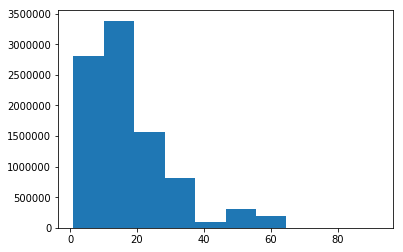

In [12]:
active_mean = np.mean(active_data['CNT_INSTALMENT'])
print('Active中央値', active_mean)
plt.hist(active_data['CNT_INSTALMENT'])

(array([4.829263e+06, 2.289058e+06, 1.106115e+06, 3.751200e+05,
        2.763080e+05, 1.584540e+05, 1.029660e+05, 1.364100e+04,
        1.620000e+02, 6.000000e+00]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

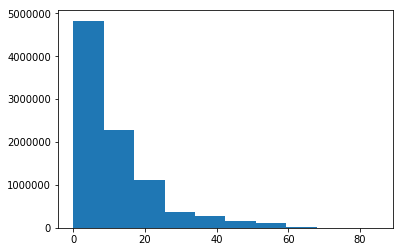

In [13]:
plt.hist(active_data['CNT_INSTALMENT_FUTURE'])

Active: 契約中　→欠損値処理：規則性がみられないのでとりあえず平均値代入法？でいいのかな・・・

In [14]:
#Approved:承認済み
appr_data = pos_cash_balance.query('NAME_CONTRACT_STATUS == "Approved"')
appr_data.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1204,2210238,309584,-34,36.0,36.0,Approved,0,0
2529,2805784,423358,-40,36.0,36.0,Approved,0,0
2544,1209943,274010,-41,48.0,48.0,Approved,0,0
7059,1334594,185047,-38,36.0,36.0,Approved,0,0
9386,2086138,288753,-32,NaN,NaN,Approved,0,0


欠損値と他データとの規則性はなさそう？<br>
署名済みの時点で欠損というのは、、、どの時点の欠損値なの？<br>

<元銀行マンの話><br>
ローン組みたいと思ってます→署名<br>
ローンの説明受けました→署名<br>
ローンの内容に理解しました→署名<br>
ローン契約します→署名<br>

In [15]:
print('The percentage of null : ', appr_data['CNT_INSTALMENT'].isnull().sum()/len(appr_data['CNT_INSTALMENT']))
print(appr_data['CNT_INSTALMENT'].isnull().sum())
print(appr_data['CNT_INSTALMENT_FUTURE'].isnull().sum())
# appr_data[appr_data['CNT_INSTALMENT'].isnull()].index == appr_data[appr_data['CNT_INSTALMENT_FUTURE'].isnull()].index
#これもエラー

The percentage of null :  0.5702664226154159
2804
2794


Approved中央値 27.989115002366304


(array([104., 465., 252., 381., 103., 357.,  52., 179.,  26., 194.]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <a list of 10 Patch objects>)

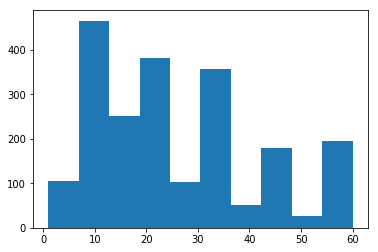

In [16]:
appr_mean = np.mean(appr_data['CNT_INSTALMENT'])
print('Approved中央値', appr_mean)
plt.hist(appr_data['CNT_INSTALMENT'])

(array([ 77., 177., 377., 217., 354., 107., 358.,  52., 181., 223.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

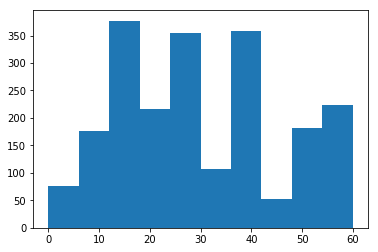

In [17]:
plt.hist(appr_data['CNT_INSTALMENT_FUTURE'])